# End-To-End Machine Learning Project
## Fetching Data

In [62]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("..", "..", "datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """download latest housing data"""
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


fetch_housing_data()

In [63]:
# Loading the data using pandas

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    """Load housing data into pandas"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [64]:
# showing the first 5 data entries to get a first view of the attributes and type of data included

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Getting a quick overview of the data attributes with .info()

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# For categorical data value_counts() provides an overview of all the different categories included in this attribute

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# .describe() provides a summary of the numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

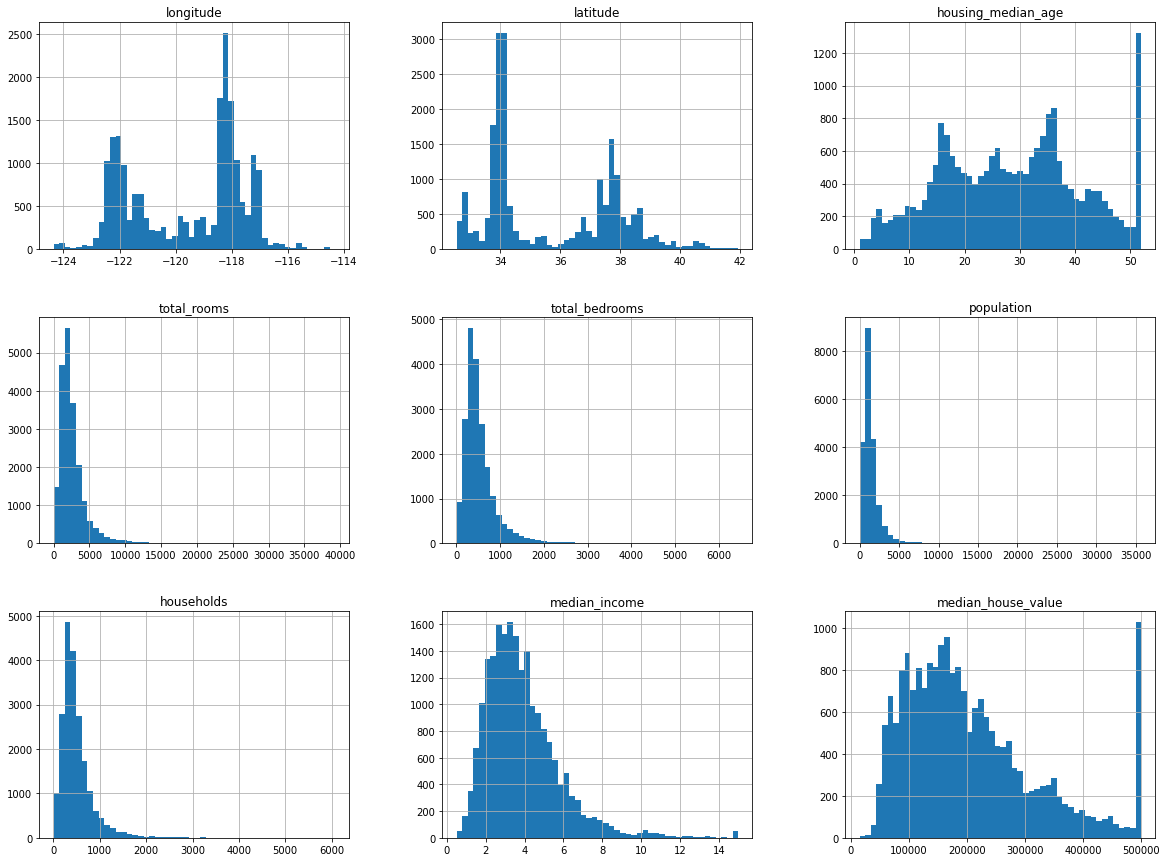

In [9]:
# Calling hist() method on the dataset depicts a histogram for all numerical data attributes

# only available in Jupyter Notebook; in IDE one would need to declare a graphical back-end
# %matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# plt.show() not necessary in Jupyter

In [10]:
# Create new income category attribute which can be used for stratified sampling (create train / test samples)

import numpy as np

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5]
)

<AxesSubplot:>

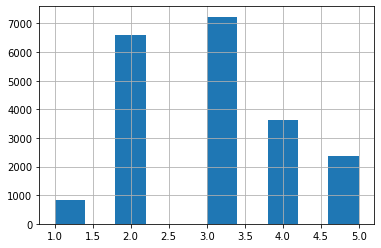

In [11]:
# Graph newly created categorical attribute

housing["income_cat"].hist()

In [12]:
# use Scikit-Learn’s StratifiedShuffleSplit class for stratified sampling based on newly created income categories

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in sss.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
# Proportional contribution of income categories

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [14]:
# Running the same analysis across the entire data sets demonstrates that the stratified test set's
# distribution across the income category is very close to the full data set

housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [15]:
# Remove income category data from test and train data set

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
# Discover and visualize the data to gain more insights
# Create a copy of training data set such that the original data set is not altered / harmed

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

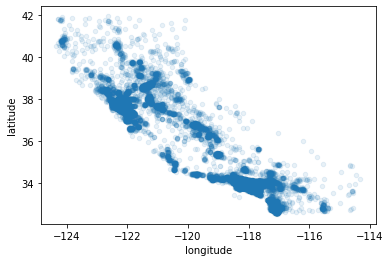

In [17]:
# Visualizing geographic data with alpha to highlight density

housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.1
)

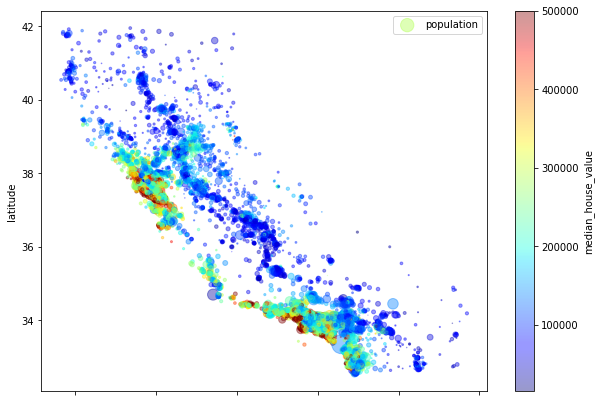

In [18]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"]/100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.legend()

In [19]:
# Looking for correlations

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

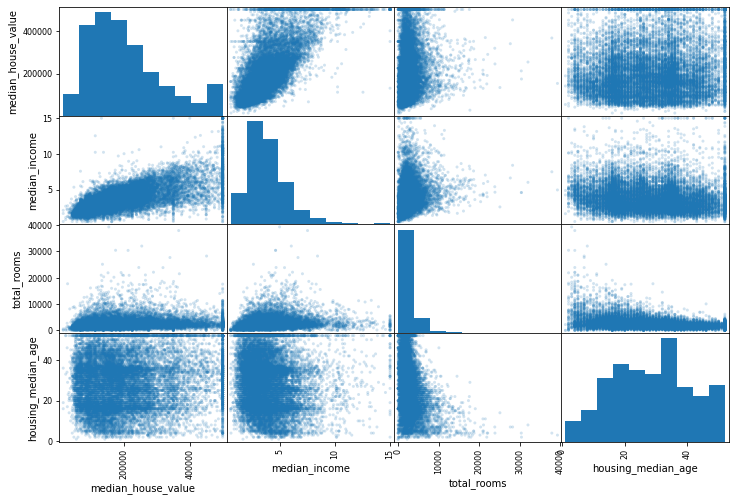

In [18]:
# Alternative to check for correlation between attributes is to use pandas' scatter_matrix()

from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing[attributes], figsize = (12, 8), alpha=0.2)


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

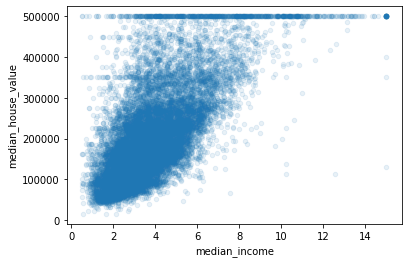

In [21]:
# Correlation scatterplot between median income and house prices reveals a number of anomalies (lines)
# In a real world scenario the data points associated with these lines should probably be removed before modelling

housing.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1
) 

In [22]:
# Creating custom attributes

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [23]:
# Creating the updated correlation matrix, including the new attributes

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [24]:
# Prepare data for ML algorithm
# Create a copy of the training set
# drop() removes index (row) or column from data frame

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
# Missing data points in total_bedrooms attribute can be dealt with using either of three options:
# 1) get rid of corresponding districts -> housing.dropna(subset=["total_bedrooms"])
# 2) get rid of the whoe attribute -> housing.drop("total_bedrooms", axis=1)
# 3) set missing data to some value -> 
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

# Scikit implements a class which deals with missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# since median can only be computed on numerical data, must create copy of training set that excludes non-numerical data
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the imputer instance to the training data using fit() method
imputer.fit(housing_num)

# Both will result in the same median data
# imputer.statistics_
# housing_num.median().values

# tranform the dataset by imputing the values for missing data points
X = imputer.transform(housing_num)
# X contains a plan NumPy array containing the transformed features

# putting the transformed features back into the dataset
housing_tr = pd.DataFrame(
    X,
    columns=housing_num.columns,
    index=housing_num.index
)

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [27]:
# Handling text and categorical attributes
# Most machine learning algos prefer to work with numbers
# use SciKit's OrdinalEncoder class to convert categorical into number data

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
# Problem with the above approach to replacing categories with numbers is that near values are assumed to be more
# similar than values farther appart
# Whilst this may be true for ordered categories (e.g. good, average, bad) it is not true in this case

# one solution is creating dummy variables / one-hot-encoding

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, population_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [31]:
# Feature scaling shifts and re-scales to a range of 0 to 1
# Min-Max-Scaling: 1) subtracting the min and 2) dividing by (max - min) for each data point (every value ranges from 0 to 1)
# Standardization: standardizes without giving undue importance to outliers

In [32]:
# Transformation pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [33]:
# Column transformer

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
# Select and train a model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210563.33661755 318260.76438827 211215.14630977  59114.79474222
 187121.77956263]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [35]:
# calculating mean squareed error

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68826.63585095564


In [36]:
# Above RMSE is poor and hence we could either:
# 1) select a more powerful model
# 2) feed training algorithm with better features
# 3) reduce constraints on model

In [37]:
# Let's try a more complex model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [38]:
# The above result is likely due to over-fitting
# to avoid using the test set we can use sklearn to split the training data set into 10 folds
# optimisation is sought by maximising the utility function across 10 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std Dev: ", scores.std())

display_scores(tree_rmse_scores)

Scores: [66799.16304181 68041.24585196 70794.52278336 69213.91119047
 69656.16778258 73816.95371911 72430.05316923 72170.88131506
 74980.56321316 71234.51813126]
Mean: 70913.79801979921
Std Dev:  2421.080217978711


In [44]:
# computing the same scores for linear regression model

lin_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66899.81050358 67175.37517063 70150.13267841 74996.34376617
 67805.64981263 71294.59349397 65185.41837241 68217.48595344
 72578.14406325 67736.06602734]
Mean: 69203.90198418254
Std Dev:  2843.5694498507464


In [43]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores)
display_scores(forest_rmse_scores)

[49468.92068481 48099.69414642 50445.86160962 52606.30894717
 49857.20069925 53866.34631365 49090.19758654 47700.1752958
 53060.14867032 50496.77388469]
Scores: [49468.92068481 48099.69414642 50445.86160962 52606.30894717
 49857.20069925 53866.34631365 49090.19758654 47700.1752958
 53060.14867032 50496.77388469]
Mean: 50469.162783827815
Std Dev:  1984.4637320389254


## Fine Tune Model

### Grid Search

In [48]:
# filter through hyperparameters to find the best combination of hyperparameters
# the following sklearn model searches for the best combination of hyperparameter values for the RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "n_estimators": [3, 10, 30, 50, 70],
        "max_features": [2, 4, 6, 8, 10]
    },
    {
        "bootstrap": [False],
        "n_estimators": [3, 10],
        "max_features": [2, 3, 4]
    }
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring = "neg_mean_squared_error",
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 70]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
print(grid_search.best_params_)

{'max_features': 6, 'n_estimators': 70}


In [50]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64230.79176994662 {'max_features': 2, 'n_estimators': 3}
55422.094992027836 {'max_features': 2, 'n_estimators': 10}
52855.24883069535 {'max_features': 2, 'n_estimators': 30}
52845.21252309942 {'max_features': 2, 'n_estimators': 50}
52119.6356575368 {'max_features': 2, 'n_estimators': 70}
60624.84522741209 {'max_features': 4, 'n_estimators': 3}
53040.96361664445 {'max_features': 4, 'n_estimators': 10}
50853.57034926745 {'max_features': 4, 'n_estimators': 30}
50492.453055238904 {'max_features': 4, 'n_estimators': 50}
50368.08849065994 {'max_features': 4, 'n_estimators': 70}
59321.69339324898 {'max_features': 6, 'n_estimators': 3}
52603.36132125271 {'max_features': 6, 'n_estimators': 10}
50747.197016772174 {'max_features': 6, 'n_estimators': 30}
50610.65764571194 {'max_features': 6, 'n_estimators': 50}
49821.06238362463 {'max_features': 6, 'n_estimators': 70}
59793.78055629323 {'max_features': 8, 'n_estimators': 3}
52695.81837640604 {'max_features': 8, 'n_estimators': 10}
50725.5783062685

### Randomized Search

+ Grid search is fine for relatively few hyperparameter combinations
+ if the hyperparameter search space is large, using RandomizedSearchCV is preferable
+ instead of evaluation all possible combinations, this class evaluates a given number of random combinations

### Ensemble Search
+ combining different models often works better than the best individual one (just like Random Forests perform better than individual decision trees)

## Analyze the Best Models and their Errors

In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.05051849e-02, 6.91026830e-02, 4.46351560e-02, 1.82477781e-02,
       1.73535682e-02, 1.72378573e-02, 1.68775575e-02, 3.77370586e-01,
       7.14600187e-02, 6.48079161e-02, 7.81579032e-02, 1.08739545e-02,
       1.35915364e-01, 9.10299835e-05, 3.27141583e-03, 4.09202664e-03])

In [56]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3773705859495514, 'median_income'),
 (0.13591536415621538, 'INLAND'),
 (0.07815790317339656, 'bedrooms_per_room'),
 (0.07146001867863105, 'rooms_per_hhold'),
 (0.07050518490940666, 'longitude'),
 (0.06910268295409011, 'latitude'),
 (0.06480791609908926, 'pop_per_hhold'),
 (0.04463515596690259, 'housing_median_age'),
 (0.018247778125678432, 'total_rooms'),
 (0.01735356823255676, 'total_bedrooms'),
 (0.017237857312508122, 'population'),
 (0.016877557532514784, 'households'),
 (0.010873954454748399, '<1H OCEAN'),
 (0.004092026639516905, 'NEAR OCEAN'),
 (0.003271415831727867, 'NEAR BAY'),
 (9.102998346567217e-05, 'ISLAND')]

## Evaluate Final Model on the Test Set

In [58]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48037.35442947284

In [59]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)
))

array([46024.19911501, 49969.47004909])